In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import matplotlib.image as mpimg

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt

IMAGE_SIZE = [224, 224]

train_path = 'training_set'
valid_path = 'test_set'

In [4]:
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
vgg.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [6]:
for layer in vgg.layers:
  layer.trainable = False


x = Flatten()(vgg.output)

In [7]:
prediction = Dense(16, activation='softmax')(x)

In [8]:
model = Model(inputs=vgg.input, outputs=prediction)

In [9]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
training_set = train_datagen.flow_from_directory('training_set',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('test_set',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 5800 images belonging to 16 classes.
Found 678 images belonging to 16 classes.


In [11]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='pokedextransfer.weights.best.hdf5', verbose=1, 
                               save_best_only=True)

In [12]:
model.load_weights('pokedex_new2.weights.best.hdf5')

gengar


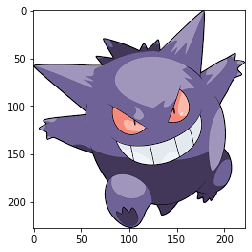

In [14]:
img_width, img_height = 224, 224
img = image.load_img('gg3.png',target_size =(img_width, img_height))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)
plt.imshow(mpimg.imread('gg3.png'))
a=model.predict(img)
l=a.tolist()
l2=[]
for item in l:
    for it in item:
        l2.append(it)

pokemon_list=['blaziken','charizard','eevee','empoleon','gengar','golbat','jigglypuff','machamp','meowth','onix','pidgeot','Pikachu','scyther','snorlax','Squirtle','venusaur']

for i in range(len(pokemon_list)):
    if l2[i]==1.0:
        key=i
        print(pokemon_list[key])
        break
    
    

In [11]:
score=model.evaluate(test_set)

C:\Users\Asus\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


22/22 [==============================] - 280s 13s/step


In [12]:
print("accuracy is:",score[1])

accuracy is: 0.9365781545639038


In [37]:
stats={
        0:{ "name":"blaziken",
           "hp":80,
           "attack":120,
           "defense":70,
           "speed":80,
           "type":["fire","fighting"]
        },
       1:{ "name":"charizard",
           "hp":78,
           "attack":84,
           "defense":78,
           "speed":100,
           "type":["fire","flying"]
           },

       2:{ "name":"eevee",
           "hp":55,
           "attack":55,
           "defense":50,
           "speed":55,
           "type":["normal"]
           },
       
       3:{ "name":"empoleon",
           "hp":84,
           "attack":86,
           "defense":88,
           "speed":60,
           "type":["water","steel"]
           },
       
               
        4:{   "name":"gengar",
             "hp":60,
             "attack":65,
             "defense":60,
             "speed":110,
             "type":["poison","ghost"]
             },
       
               
        5:{   "name":"golbat",
             "hp":75,
             "attack":80,
             "defense":70,
             "speed":90,
             "type":["flying","poison"]
             },
                
        6:{     "name":"jigglypuff",
                "hp":115,
                "attack":45,
                "defense":20,
                "speed":20,
                "type":["normal","fairy"]
            },
       
               
        7:{   "name":"machamp",
             "hp":90,
             "attack":130,
             "defense":80,
             "speed":55,
             "type":["fighting"]
             },
       
               
        8:{   "name":"meowth",
             "hp":40,
             "attack":45,
             "defense":35,
             "speed":90,
             "type":["normal"]
             },
        
        9:{ "name":"onix",
            "hp":35,
           "attack":45,
           "defense":160,
           "speed":70,
           "type":["ground","rock"]
           },
       
               
        10:{   "name":"pidgeot",
             "hp":83,
             "attack":80,
             "defense":75,
             "speed":101,
             "type":["flying","normal"]
             },
          
         11:{"name":"pikachu",
            "hp":35,
           "attack":55,
           "defense":40,
           "speed":90,
           "type":["electric"]
           },
       
               
        12:{   "name":"scyther",
             "hp":70,
             "attack":110,
             "defense":80,
             "speed":105,
             "type":["flying","bug"]
             },
       
               
        13:{   "name":"snorlax",
             "hp":120,
             "attack":90,
             "defense":65,
             "speed":30,
             "type":["normal"]
             },
            
         14:{"name":"squirtle",
            "hp":44,
           "attack":48,
           "defense":65,
           "speed":43,
           "type":["water"]
           },
       
               
        15:{   "name":"venusaur",
             "hp":80,
             "attack":82,
             "defense":83,
             "speed":80,
             "type":["grass","poison"]
             },
               
       
       }

In [66]:
class Node:
    def __init__(self, name_data,image_data):
        self.name = name_data
        self.image =image_data
        self.ref = None
        
class LinkedList:
    
    def __init__(self):
        self.start_node = None
        
    def insert_at_end(self,name_data,image_data):
        new_node = Node(name_data,image_data)
        if self.start_node is None:
            self.start_node = new_node
            return
        n = self.start_node
        while n.ref is not None:
            n= n.ref
        n.ref = new_node
        
    def traverse_list(self):
        i=1
        names=[]
        if self.start_node is None:
            print("Pokedex has no element")
            return
        else:
            n = self.start_node
            fig = plt.figure(figsize=(15,15))
            while n is not None:
                print(n.name , " ")
                names.append(n.name)
                ax = fig.add_subplot(5, 1,i) 
                ax.imshow(np.squeeze(mpimg.imread(n.image)))
                i+=1

                #print(mpimg.imread(n.image))
                print()
                n = n.ref
            return names


In [68]:
print("Preparing your team.....Type START to start building your team.  ")
pokedex=LinkedList()

s=input()
f="YES"
if s=="START":
    
    while f=="YES":
        img_name=input('Enter name of the image with extension  ')
        img = image.load_img(img_name, target_size = (img_width, img_height))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis = 0)
        a=model.predict(img)
        l=a.tolist()
        l2=[]
        
        for item in l:
            for it in item:
                l2.append(it)
        pokemon_list=['blaziken','charizard','eevee','empoleon','gengar','golbat','jigglypuff','machamp','meowth','onix','pidgeot','Pikachu','scyther','snorlax','squirtle','venusaur']
        
        for i in range(len(pokemon_list)):
            if l2[i]==1.0:
                key=i
                break
        pokemon_name=pokemon_list[key]
        
        pokedex.insert_at_end(pokemon_name,img_name)
        f=(input('Enter YES if you want to add another poekmon  '))
        
else:
    print("Thanks, Build your team later ")
        


        
    
        

        
        
        
   

Preparing your team.....Type START to start building your team.  
START
Enter name of the image with extension  pidgeot.jpg
Enter YES if you want to add another poekmon  YES
Enter name of the image with extension  detpika.jpg
Enter YES if you want to add another poekmon  YES
Enter name of the image with extension  blazi.jpg
Enter YES if you want to add another poekmon  YES
Enter name of the image with extension  machamp.jpg
Enter YES if you want to add another poekmon  no


pidgeot  

Pikachu  

blaziken  

machamp  



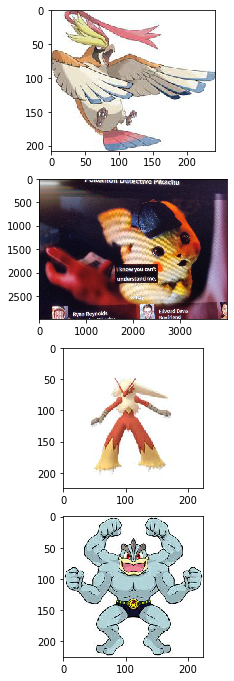

In [69]:
names=pokedex.traverse_list()

In [70]:
img_name=input('Enter name of the image with extension  ')
img = image.load_img(img_name, target_size = (img_width, img_height))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)
a=model.predict(img)
l=a.tolist()
l2=[]
        
for item in l:
    for it in item:
        l2.append(it)
pokemon_list=['blaziken','charizard','eevee','empoleon','gengar','golbat','jigglypuff','machamp','meowth','onix','pidgeot','Pikachu','scyther','snorlax','Squirtle','venusaur']
        
for i in range(len(pokemon_list)):
    if l2[i]==1.0:
        key=i
        break
pokemon_name=pokemon_list[key]
print(pokemon_name)



Enter name of the image with extension  emp.jpg
empoleon


In [71]:
for index in stats.keys():
    
    if stats[index]["name"]==pokemon_name:
        
        opp_index=index
        break
        
print(opp_index)

3


In [72]:
type_chart = {
        "normal": [["rock", "ghost", "steel","fighting"],["fire","water","grass","electric","ground","poison"]],
        "poison": [["poison", "ground", "rock", "ghost", "steel","psychic"],["grass"]],
        "electric" : [["ground", "grass", "electric", "dragon"],["water","flying"]],
        "water": [["water", "grass", "dragon","electric"],["fire","ground","rock"]],
        "ground": [["flying", "bug", "grass","water", "ice"],['fire','electric','poison','rock']],
        "flying":[["rock", "steel", "electric"],["fighting", "bug", "grass"]],
        "grass": [["flying", "poison", "bug", "steel", "fire", "grass", "dragon"],["ground", "rock", "water"]],
        "fighting":[["Flying", "Poison", "Psychic", "Bug", "Ghost", "Fairy"],["Normal", "Rock", "Steel", "Ice", "Dark"]],
        "steel":[["Steel", "Fire", "Water", "Electric"],["Rock", "Ice", "Fairy"]],
        "ghost":[["Normal", "Dark"],["Ghost", "Psychic"]],
        "fairy":[["Poison", "steel", "Fire"],["Fighting", "Dragon", "Dark"]],
        "rock":[["Fighting", "Ground", "Steel"],["Flying", "Bug", "Fire", "Ice"]],
        "bug":[["Fighting", "Flying", "Poison", "Ghost", "Steel", "Fire", "Fairy"],["Grass", "Psychic", "Dark"]],
        "fire" :[["Rock", "Fire", "Water", "Dragon","Ground"], ["Bug", "Steel", "Grass", "Ice"]]
    
       
        }

In [73]:
import math as mt
def sigmoid(item,sum1):
    item=1/(1+ mt.exp(-item/sum1))
    return item

In [78]:
score_list=[]
for item in names:
    score=0
    for index in stats.keys():
        if stats[index]["name"]==item:
            break
    score+=0.3*(stats[index]["hp"]-stats[opp_index]["hp"])+0.4*(stats[index]["attack"]-stats[opp_index]["attack"])+0.2*(stats[index]["defense"]-stats[opp_index]["defense"])+0.1*(stats[index]["speed"]-stats[opp_index]["speed"])
    my_type=stats[index]['type']
    opp_type=stats[opp_index]['type']
    for my_ty in my_type:
        for opp_ty in opp_type:
            if opp_ty.lower() in type_chart[my_ty.lower()][0]:
                score-=5
            elif opp_ty.lower() in type_chart[my_ty.lower()][1]:
                score+=5
    
    
    print(score)
    score_list.append(score)
'''sum1=sum(score_list)
score_list1=[sigmoid(item,sum1) for item in score_list]
sum2=sum(score_list1)
final_scores=[item/sum2 for item in score_list1]
print(final_scores)'''

-6.2
-6.8
10.800000000000002
17.3


'sum1=sum(score_list)\nscore_list1=[sigmoid(item,sum1) for item in score_list]\nsum2=sum(score_list1)\nfinal_scores=[item/sum2 for item in score_list1]\nprint(final_scores)'

In [80]:
maxi_score=max(score_list)
ind=score_list.index(maxi_score)
print(names[ind])

machamp


In [ ]:
score_list=[]
for item in names:
    score=0
    for index in stats.keys():
        if stats[index]["name"]==item: #Searching for the pokemon
            break
    score+=0.3*(stats[index]["hp"]-stats[opp_index]["hp"])+0.4*(stats[index]["attack"]-stats[opp_index]["attack"])+0.2*(stats[index]["defense"]-stats[opp_index]["defense"])+0.1*(stats[index]["speed"]-stats[opp_index]["speed"])
    my_type=stats[index]['type']
    opp_type=stats[opp_index]['type']
    for my_ty in my_type:
        for opp_ty in opp_type:
            if opp_ty.lower() in type_chart[my_ty.lower()][0]:
                score-=5
            elif opp_ty.lower() in type_chart[my_ty.lower()][1]:
                score+=5
    score_list.append(score)




In [ ]:
#QUICK SORT
def partition(array, start, end):
    pivot = array[start]
    low = start + 1
    high = end
     while True:
        while low <= high and array[high] >= pivot:
            high = high - 1
        while low <= high and array[low] <= pivot:
            low = low + 1

        if low <= high:
            array[low], array[high] = array[high], array[low]
            
        else:
            break

    array[start], array[high] = array[high], array[start]

    return high

def quick_sort(array, start, end):
    if start >= end:
        return

    p = partition(array, start, end)
    quick_sort(array, start, p-1)
    quick_sort(array, p+1, end)
    
quick_sort(score_list, 0, len(score_list) - 1)
print(score_list)
